# Introduction

The purpose of this notebook is to practice Feature Selection using the Python language and associated tools.

[section title](222)

## 1) Import Data

In this demo we'll be using the Boston Housing dataset. There are 506 rows in the dataset. The target variable is median home price. There are 13 predictor variables including average number of rooms per dwelling, crime rate by town, etc. More information about this dataset can be found at [UCI][uci link]. [uci link]: https://archive.ics.uci.edu/ml/datasets/Housing

##### Initial Package Load

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np 
import seaborn as sb

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#Import Data
from sklearn.datasets import load_boston
boston = load_boston()

feature_names = boston.feature_names
X = pd.DataFrame(boston.data, columns= feature_names )
y = pd.DataFrame(boston.target, columns= ['target'])

print(str(X.shape) + ' ' + '#Feature Variables dimensions' + '\n')
print(str(y.shape) + ' ' + '#Target Variable dimensions' + '\n')
# print('Feature Names')
# print(str(feature_names) + ' ' + '#Feature Names' + '\n')
print(boston.DESCR)

(506, 13) #Feature Variables dimensions

(506, 1) #Target Variable dimensions

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value prop

## 2) Exploritory Analysis

##### Visualize head of Feature Variables and Target Variable

In [3]:
print('Head of Feature Variables')
print(X.head())
print(' ')
print(' Head of Target Variable')
print(y.head())

Head of Feature Variables
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
 
 Head of Target Variable
   target
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2


###### Descriptive Statistics

In [4]:
# Descriptive Statistics
print('# mean, std, interquartiles, etc')
print(X.describe())

# mean, std, interquartiles, etc
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.6740

##### Checking for the presence of NULL values

In [5]:
# # Check for the presence of NULL values
print('# Number of NULL Values')
print(str(X.isnull().sum().sum()))

# Number of NULL Values
0


##### Visualize Data: Feature Relationships | Feature DistributionsÂ¶


scatter plot of Feature Variables 0 - 6


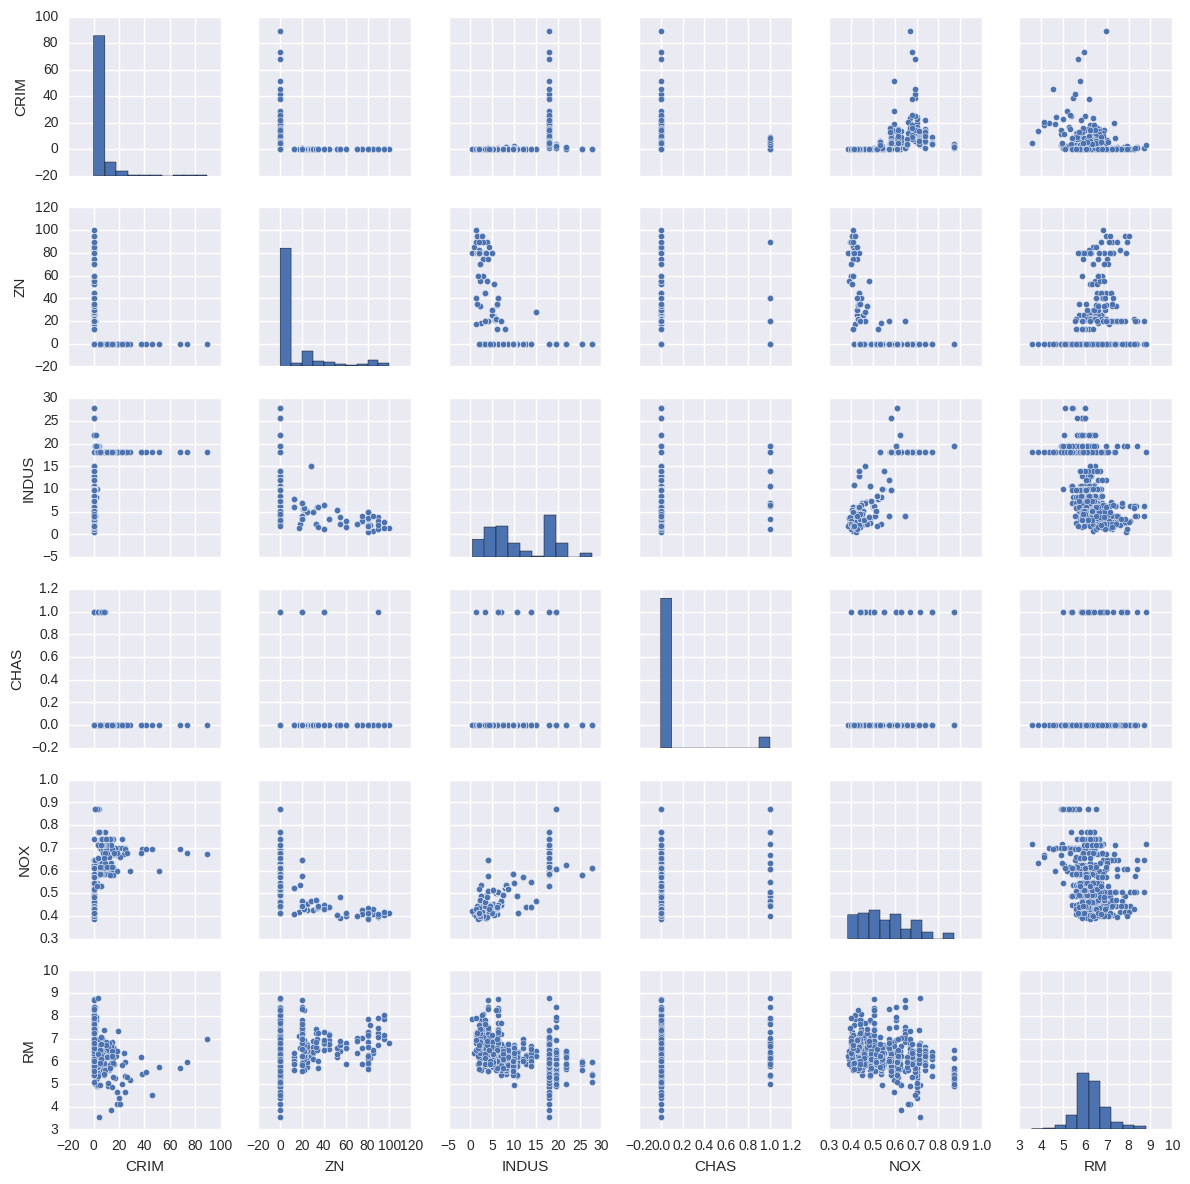

In [6]:
# Create a Scatter Plot Matrix of Feature Variables to view feature relationships
print('scatter plot of Feature Variables 0 - 6')
sb.pairplot(X[X.columns[:6]], size= 2)

scatter plot of Feature Variables 7 - 13


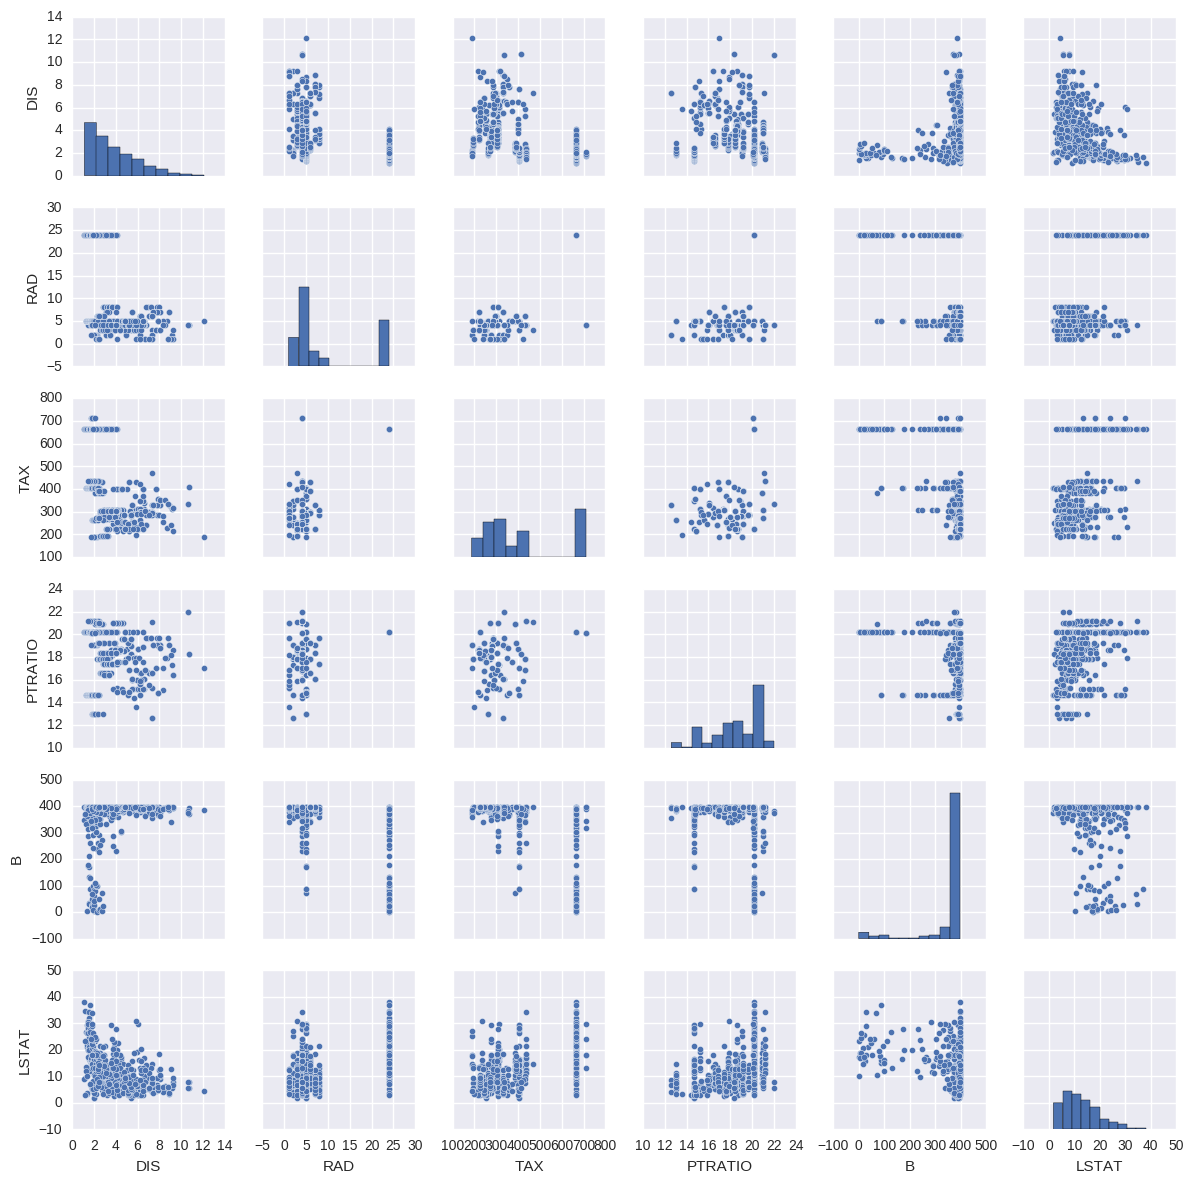

In [12]:
# Create a Scatter Plot Matrix of Feature Variables to view feature relationships
print('scatter plot of Feature Variables 7 - 13')
sb.pairplot(X[X.columns[7:13]], size= 2)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


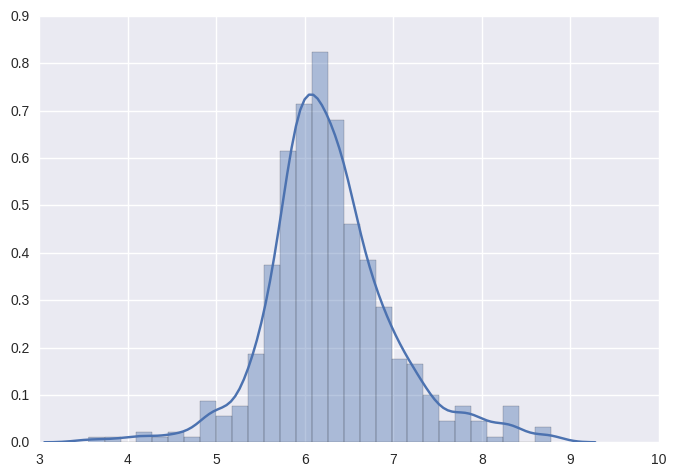

In [13]:
# Create a Histogram to view the distribution of Feature variables

## Replace the underscore with the name of the feature variable
### Example: sb.distplot(X[['_']])
#### Feature names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

sb.distplot(X[['RM']])

## 3) Recursive Feature Elimination

The sklearn package has several feature selection methods and details can be found at the documentation site. In this example we'll be using the recursive feature elimination method. This process starts with all variables and assigns weights to them. Those with small weights are first removed. The remaining variables are used to refit the model and the process repeats.

##### Import packages needed for Feature Selecting

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.feature_selection import RFECV

##### Split data into train and test set

In [10]:
from sklearn.model_selection import train_test_split
# Split data into train/test set; training set has a 70% split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= .7 , random_state=0) # Random_state set to 0 for reproducability


##### Before conducting feature selection lets first scale the features using Min-Max Scaler

In [14]:
# Scale feature variables
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train)) # Transform into pandas DataFrame at the same time
X_test_scaled = pd.DataFrame(min_max_scaler.transform(X_test))
print(X_train_scaled.head())
type(X_train_scaled)

         0    1         2    3         4         5         6         7   \
0  0.018234  0.0  0.785557  0.0  0.491770  0.279364  1.000000  0.024214   
1  0.001217  0.2  0.238270  0.0  0.162551  0.570416  0.574665  0.250477   
2  0.006198  0.0  0.785557  0.0  0.491770  0.531519  0.981462  0.085507   
3  0.000656  0.7  0.065249  0.0  0.030864  0.533436  0.177137  0.607507   
4  0.000974  0.0  0.923387  0.0  0.403292  0.459858  0.926880  0.083334   

         8         9         10        11        12  
0  0.130435  0.477099  0.914894  1.000000  0.927092  
1  0.086957  0.068702  0.638298  0.995108  0.170213  
2  0.130435  0.477099  0.914894  0.994377  0.432057  
3  0.173913  0.326336  0.234043  0.927732  0.091915  
4  0.043478  0.001908  0.691489  0.952569  0.459574  


pandas.core.frame.DataFrame

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 6 out of 13
Features selected: ['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']


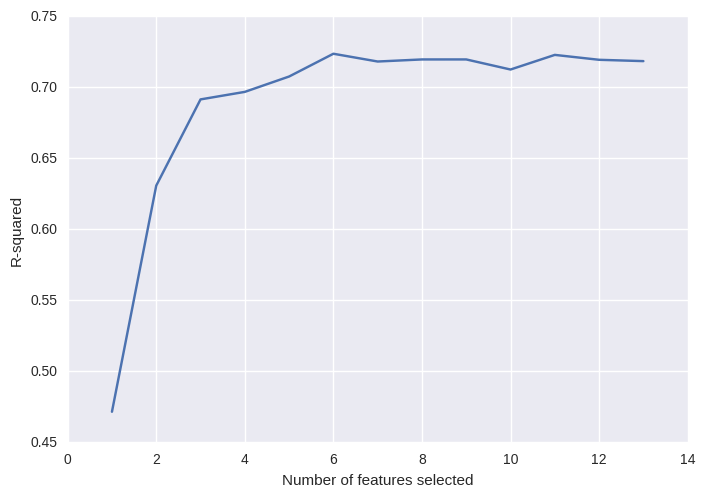

In [15]:
# Inititate the linear model 
lm_estimator = LinearRegression()

rfecv = RFECV(lm_estimator, step=1, cv=5).fit(X_train_scaled, y_train)

# print the optimal number of feature
print("Optimal number of features : %d" % rfecv.n_features_ + ' ' + 'out of %d' % X.shape[1])

# save the selected features
feature_cols_selected = list(np.array(feature_names)[rfecv.support_])
print("Features selected: " + str(feature_cols_selected))

# plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("R-squared")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## 4) Fit Linear Model

##### Fit linear model with non-scaled data

In [16]:
from numpy import reshape

# fit model with selected features
X_new = X[feature_cols_selected]
lm = LinearRegression()
lm.fit(X_new, y)

# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X_new, y)))

# save intercept and coefficients
## first, reshape lm.coef in order to work with pandas DataFrame
lm_coef = lm.coef_.reshape(-1)
param_df = pd.DataFrame({"Features": ['intercept'] + feature_cols_selected, "Coef": list(lm.intercept_) + list(lm_coef)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

The R-squared value is: 0.7113 

    Features       Coef
0  intercept  35.629382
1       CRIM  -0.071002
2        NOX -17.043777
3         RM   4.246403
4        DIS  -1.204040
5    PTRATIO  -1.001903
6      LSTAT  -0.554361


##### Fit linear model with scaled data

In [17]:
# fit model with selected features

X_train_scaled.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
X_train_new = X_train_scaled[feature_cols_selected]
lm2 = LinearRegression()
lm2.fit(X_train_new, y_train)

# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))

# save intercept and coefficients
## first, reshape lm.coef in order to work with pandas DataFrame
lm2_coef = lm2.coef_.reshape(-1)
param_df = pd.DataFrame({"Features": ['intercept'] + feature_cols_selected, "Coef": list(lm2.intercept_) + list(lm2_coef)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

The R-squared value is: 0.7438 

    Features       Coef
0  intercept  29.734418
1       CRIM  -7.585371
2        NOX  -8.679545
3         RM  22.097888
4        DIS -12.918542
5    PTRATIO -10.464444
6      LSTAT -18.730952


## 5) Make Predictions & Evaluate

#### Let's make predictions on our test set

##### non-scaled data set

In [18]:
# assign test data
newX = X_new
newY = y

# make predictions
predicted = lm.predict(newX)
predicted = predicted.reshape(-1)
predictedDf = pd.DataFrame({"predicted": list(predicted)})

# dataframe for X
newXDf = pd.DataFrame(newX)
newXDf.columns = feature_cols_selected
# dataframe for y
newYDf = pd.DataFrame(newY)
newYDf.columns = ['MEDV']
# join X, y and prediction
mydata_with_pd = newXDf.join(newYDf).join(predictedDf)
mydata_with_pd.head()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT,MEDV,predicted
0,0.00632,0.538,6.575,4.0900,15.3,4.98,24.0,31.365126
1,0.02731,0.469,6.421,4.9671,17.8,9.14,21.6,26.018747
2,0.02729,0.469,7.185,4.9671,17.8,4.03,34.7,32.095787
3,0.03237,0.458,6.998,6.0622,18.7,2.94,33.4,29.872827
4,0.06905,0.458,7.147,6.0622,18.7,5.33,36.2,29.178013


In [41]:
# check performance metrics
import numpy as np
obs = mydata_with_pd.MEDV
pred = mydata_with_pd.predicted

mae = np.mean(abs(pred-obs))
rmse = np.sqrt(np.mean((pred-obs)**2))
rae = np.mean(abs(pred-obs))/np.mean(abs(obs-np.mean(obs)))
rse = np.mean((pred-obs)**2)/np.mean((obs-np.mean(obs))**2)

print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

Mean Absolute Error: 3.467774
Root Mean Squared Error: 4.936601
Relative Absolute Error: 0.521689
Relative Squared Error: 0.288678


##### scaled data set

In [36]:
# make predictions

# fit model with selected features

X_test_scaled.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
X_test_new = X_test_scaled[feature_cols_selected]

predicted2 = lm2.predict(X_test_new)
predicted2 = predicted2.reshape(-1)
predictedDf2 = pd.DataFrame({"predicted": list(predicted2)})

# dataframe for X
newXDf2 = pd.DataFrame(X_test_new)
newXDf2.columns = feature_cols_selected
# dataframe for y
newYDf2 = pd.DataFrame(y_test)
newYDf2.columns = ['MEDV']
# join X, y and prediction
mydata_with_pd2 = newXDf2.join(newYDf2).join(predictedDf2)
mydata_with_pd2.head()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT,MEDV,predicted
0,0.000685,0.154321,0.531136,0.368909,0.457447,0.159149,NaN,27.593075
1,0.103698,0.506173,0.508718,-0.000466,0.808511,0.221277,21.6,23.196758
2,0.001213,0.339506,0.538801,0.199876,0.404255,0.248794,NaN,27.212245
3,0.278694,0.633745,0.342594,0.048264,0.808511,0.511773,NaN,11.020305
4,0.000564,0.106996,0.511784,0.350602,0.648936,0.300993,36.2,23.152901


In [40]:
# check performance metrics
import numpy as np
obs2 = mydata_with_pd2.MEDV
pred2 = mydata_with_pd2.predicted

mae2 = np.mean(abs(pred2-obs2))
rmse2 = np.sqrt(np.mean((pred2-obs2)**2))
rae2 = np.mean(abs(pred-obs))/np.mean(abs(obs2-np.mean(obs2)))
rse2 = np.mean((pred-obs)**2)/np.mean((obs2-np.mean(obs2))**2)

print("Mean Absolute Error: {0:0.6f}".format(mae2))
print("Root Mean Squared Error: {0:0.6f}".format(rmse2))
print("Relative Absolute Error: {0:0.6f}".format(rae2))
print("Relative Squared Error: {0:0.6f}".format(rse2))

Mean Absolute Error: 7.045219
Root Mean Squared Error: 9.179167
Relative Absolute Error: 0.925411
Relative Squared Error: 0.828719


<a id="222"></a>
## 6) Consume as a Web Service

For more information on how to set up a Microsoft Web Service, retrieve an workspace_id and authorization_token, please visit __[https://cran.r-project.org](https://cran.r-project.org/web/packages/AzureML/vignettes/getting_started.html)__

The purpose of the following code is to wait a few seconds so that the web service is successfully desployed and ready for consumption.

In [42]:
# wait 
import time
time.sleep(10)

The code below can be used to consume the web service. For illustration purpose the data for two records are provided.

In [ ]:
import urllib2
# If you are using Python 3+, import urllib instead of urllib2

import json 


data =  {

        "Inputs": {

                "input1":
                {
                    "ColumnNames": ["crim", "lstat", "nox", "rm", "ptratio", "dis"],
                    "Values": [ [ "0.00632", "4.98", "0.538", "6.575", "15.3", "4.0900" ], 
                               [ "0.02731", "9.14", "0.469", "6.421", "17.8", "4.9671" ], ]
                },        },
            "GlobalParameters": {
}
    }

body = str.encode(json.dumps(data))

url = service_url
api_key = api_key # Replace this with the API key for the web service

headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib2.Request(url, body, headers) 

try:
    response = urllib2.urlopen(req)

    # If you are using Python 3+, replace urllib2 with urllib.request in the above code:
    # req = urllib.request.Request(url, body, headers) 
    # response = urllib.request.urlopen(req)

    result = response.read()
    print(result) 
except urllib2.HTTPError, error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())

    print(json.loads(error.read()))                 


The above service consumption code is based on those at the help\_url, which contains, among others, sample code written in C#, Python, and R for consuming the web service. To check out the code for yourself, copy the help\_url value to a new browser to open the web page. Scroll down the newly opened page till you see the section "Sample Code." Click on the Python tab and you'll see the sample code. Two changes were made to the sample code:
    1. Fill in the url and api_key with the values returned for the current web service, and 
    2. Enter the values for the first two records. Notice that the order of the columns here may be different from 
    that in your definition of the web service. 